# Preprocessing

## Reading of files

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from pandas.api.types import CategoricalDtype

In [90]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()


all_decklists = []

path = "Decklists"

# iterate through all file
for file in os.listdir(path):
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\\{file}"

        # call read text file function
        all_decklists.append(read_text_file(file_path).split("\n"))

card_names_main = set()
card_names_side = set()

for decklist in all_decklists:
    mainboard = True
    for row in decklist:
        if row == "Sideboard" or row == " " or row == "":
            mainboard = False
        else:
            quant, card_name = row.strip().split(" ", 1)
        #    quant = int(quant)
            if mainboard:
                card_names_main.add(card_name)
            else:
                card_names_side.add(card_name)

card_names_main = sorted(card_names_main)
card_names_side = sorted(card_names_side)

lists_main = []
lists_side = []

for i, decklist in enumerate(all_decklists):
    lists_main.append([0] * len(card_names_main))
    lists_side.append([0] * len(card_names_side))
    mainboard = True
    for row in decklist:
        if row == "Sideboard" or row == " " or row == "":
            mainboard = False
        else:
            quant, card_name = row.strip().split(" ", 1)
            quant = int(quant)
            if mainboard:
                lists_main[i][card_names_main.index(card_name)] = quant
            else:
                lists_side[i][card_names_side.index(card_name)] = quant

## Dataframes generation

In [91]:
# Create dataframes from data collected in lists

df_main = pd.DataFrame(lists_main, columns = card_names_main)

df_side = pd.DataFrame(lists_side, columns = card_names_side)

## Preprocessing functions

In [92]:
# Function to replace group of cards within the dataframe for an identifier name.
# E.g.: Flooded Strand, Misty Rainforest, Polluted Delta and Scalding Tarn are "Fetchlands"
# USE THIS FUNCTION IN CASE DF IS ORDERED AS CARDNAMES IN COLUMNS AND NUMBER OF COPIES IN INDEX
# THIS ORDER IS THE LOGICAL ONE IN MOST DATAFRAMES, BUT HERE, IT IS EASIER TO VISUALIZE DATA AS OPPOSITE.

def card_grouper(df, cardlists, new_names):
    for cardlist, new_name in zip(cardlists, new_names):
        # Get first all the cardnames to check whether the cards in cardlist are in the deck
        cards_in_df = df.columns.tolist()          
        # In case the cards in cardlist are not in the deck, they get removed from the list
        cardlist = [card for card in cardlist if card in cards_in_df]
        # Select the subset of columns with the name of cards in cardlist and sum the number of copies in each row (decklist)
        sum = df.loc[:, df.columns.isin(cardlist)].sum(axis=1)
        # Add this new column to the original df
        df[new_name] = sum
        # Delete the original columns
        if len(sum) > 0:
            df.drop(cardlist, axis=1, inplace=True)
    # Reorder the df
    df = df[sorted(df.columns)]
    return df

In [93]:
def std_over_mean(x):
    return x.std()/x.mean()

In [94]:
def mode(x):
    return x.mode()[0]

In [95]:
def perc_0(x, number=0):
    freqs = x.value_counts(normalize=True)
    try:
        return freqs.loc[number]
    except:
        return 0

In [96]:
def perc_1(x, number=1):
    freqs = x.value_counts(normalize=True)
    try:
        return freqs.loc[number]
    except:
        return 0

In [97]:
def perc_2(x, number=2):
    freqs = x.value_counts(normalize=True)
    try:
        return freqs.loc[number]
    except:
        return 0

In [98]:
def perc_3(x, number=3):
    freqs = x.value_counts(normalize=True)
    try:
        return freqs.loc[number]
    except:
        return 0

In [99]:
def perc_4(x, number=4):
    freqs = x.value_counts(normalize=True)
    try:
        return freqs.loc[number]
    except:
        return 0

# Mainboard analysis

## Execution

In [100]:
# Execution of card_grouper function to group different cards

types_of_cards = {
    "Creatures": ["Delver of Secrets", "Dragon's Rage Channeler", "Murktide Regent", "Brazen Borrower", "Ethereal Forager",
            "Mercurial Spelldancer", "Sprite Dragon", "Third Path Iconoclast", "True-Name Nemesis"],
    "Counters": ["Force of Will", "Daze", "Force of Negation", "Spell Pierce", "Minor Misstep", "Stifle"],
    "Removals": ["Lightning Bolt", "Chain Lightning", "Unholy Heat"],
    "Cantrips": ["Brainstorm", "Ponder", "Preordain", "Predict", "Mishra's Bauble", "Chart a Course", "Reckless Impulse"],
    "Dual Lands": ["Volcanic Island", "Steam Vents"],
    "Basic Islands": ["Island", "Snow-Covered Island", "Basic Islands"],
    "Mystic Sanctuary": ["Mystic Sanctuary"],
    "Fetchlands": ["Flooded Strand", "Misty Rainforest", "Polluted Delta", "Scalding Tarn"],
    "Wasteland": ["Wasteland"],
    "Others": ["Pyroblast"]
}

# cardlists = [creatures, counters, removals, cantrips, dual_lands, basic_islands, fetchlands]
# cardnames = ["Creatures", "Counters", "Removals", "Cantrips", "Dual Lands", "Basic Islands", "Fetchlands",  ]

cardlists = [["Island", "Snow-Covered Island"]]
cardnames = ["Basic Islands"]

df_main = card_grouper(df_main, cardlists, cardnames)




# ¡¡¡OJO!!! Hay que revisar que la función card_grouper sigue funcionando después de cambiar types_of_cards a un dict







In [101]:
# Establish specific order to show the list after groupings
# usual_cards_main = ["Creatures", "Counters", "Removals", "Cantrips", "Mishra's Bauble", "Volcanic Island",
#                     "Steam Vents", "Basic Islands", "Mystic Sanctuary", "Fetchlands", "Wasteland"]
usual_cards_main = ["Delver of Secrets", "Dragon's Rage Channeler", "Murktide Regent", "Brazen Borrower",
                    "Force of Will", "Daze", "Lightning Bolt", "Chain Lightning", "Unholy Heat", "Brainstorm",
                    "Ponder", "Mishra's Bauble", "Volcanic Island", "Steam Vents", "Basic Islands", "Mystic Sanctuary",
                    "Flooded Strand", "Misty Rainforest", "Polluted Delta", "Scalding Tarn", "Wasteland"]

# Creating a list of the cards not included in the usual_cards, to show them after the usual ones
cols_main = df_main.columns.tolist()
extra_cards_main = [element for element in cols_main if element not in usual_cards_main]

# The order of the dataframe will be the usual cards firstly, and then the extra cards
main_order = usual_cards_main + extra_cards_main

# Ordering of the dataframe
df_main = df_main[main_order]

# And transposing for better visualization
df_main_t = df_main.T

In [102]:
# Creation of df for statistic analysis
df_main_agg = df_main.agg([mode, "median", "mean", "std", std_over_mean, "sum", "count", "min", "max",
                           perc_0, perc_1, perc_2, perc_3, perc_4])
# And transpose the df to better visualization
df_main_agg_t = df_main_agg.T

In [103]:
# Drop outliers, defined as if sum of copies < THOLD * total list * 4 copies/list

# Definition of threshold
THOLD = 0.02

# Condition to satisfy
min_card_number = df_main.shape[0] * 4 * THOLD

# Mask to select cols to be dropped
mask = df_main_agg.loc["sum"] < min_card_number

# Extraction of column names to be dropped
cols_to_drop = df_main_agg.loc[:, mask].columns

# Dropping of columns selected
df_main_agg.drop(cols_to_drop, axis=1, inplace=True)

# Update of transposed df
df_main_agg_t = df_main_agg.T

In [104]:
# Add column to df_main_agg_t indicating the type of card (creature, counter, removal, cantrip,land or other)

columns = df_main_agg.columns
cards_with_types = []

for card in columns:
    for type in types_of_cards:
        if card in types_of_cards[type]:
            cards_with_types.append(type)
            break
        else:
            if type == "Others":
                cards_with_types.append(type)
                
df_main_agg_t["Type"] = pd.Series(cards_with_types, index=columns)
df_main_agg = df_main_agg_t.T

In [105]:
# Define column "Type" as categorical so we can custom order it then
cat_type_order = CategoricalDtype(["Creatures", "Counters", "Removals", "Cantrips", "Dual Lands",
                                 "Basic Islands", "Mystic Sanctuary", "Fetchlands", "Wasteland", "Others"], ordered=True)

df_main_agg_t["Type"] = df_main_agg_t["Type"].astype(cat_type_order)

# Update of transposed df
df_main_agg = df_main_agg_t.T

#¡¡¡OJO!!! La linea de arriba no updatea la fila Type al tipo de dato categórico. Revisar.






In [106]:
df_main_agg_t.sort_values(by=["Type", "sum"], ascending=[True, False])

,mode,median,mean,std,std_over_mean,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4,Type
Dragon's Rage Channeler,4.0,4.0,3.882353,0.680856,0.175372,264.0,68.0,0.0,4.0,0.029412,0.000000,0.000000,0.000000,0.970588,Creatures
Murktide Regent,4.0,4.0,3.485294,0.722612,0.207332,237.0,68.0,0.0,4.0,0.014706,0.000000,0.044118,0.367647,0.573529,Creatures
Delver of Secrets,4.0,4.0,3.308824,1.478779,0.446920,225.0,68.0,0.0,4.0,0.161765,0.000000,0.000000,0.044118,0.794118,Creatures
Brazen Borrower,1.0,1.0,1.235294,0.693631,0.561511,84.0,68.0,0.0,2.0,0.147059,0.470588,0.382353,0.000000,0.000000,Creatures
Third Path Iconoclast,0.0,0.0,0.426471,1.097027,2.572339,29.0,68.0,0.0,4.0,0.852941,0.014706,0.029412,0.058824,0.044118,Creatures
Mercurial Spelldancer,0.0,0.0,0.323529,0.905063,2.797468,22.0,68.0,0.0,3.0,0.882353,0.000000,0.029412,0.088235,0.000000,Creatures
Sprite Dragon,0.0,0.0,0.294118,0.978253,3.326062,20.0,68.0,0.0,4.0,0.897059,0.029412,0.014706,0.000000,0.058824,Creatures
True-Name Nemesis,0.0,0.0,0.147059,0.432442,2.940606,10.0,68.0,0.0,2.0,0.882353,0.088235,0.029412,0.000000,0.000000,Creatures
Ethereal Forager,0.0,0.0,0.088235,0.539079,6.109558,6.0,68.0,0.0,4.0,0.970588,0.000000,0.014706,0.000000,0.014706,Creatures
Force of Will,4.0,4.0,4.000000,0.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Counters


In [107]:
summary = df_main_agg_t.groupby(by="Type").sum()
summary

,mode,median,mean,std,std_over_mean,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4
Type,,,,,,,,,,,,,,
Creatures,13.0,13.0,13.191176,7.527742,19.137167,897.0,612.0,0.0,31.0,4.838235,0.602941,0.544118,0.558824,2.455882
Counters,8.0,8.0,9.029412,2.918687,11.985905,614.0,408.0,7.0,19.0,3.294118,0.308824,0.352941,0.161765,1.882353
Removals,4.0,5.0,5.352941,1.703929,2.400794,364.0,204.0,3.0,9.0,1.014706,0.617647,0.338235,0.058824,0.970588
Cantrips,12.0,11.0,12.926471,5.029034,9.327619,879.0,476.0,8.0,28.0,3.147059,0.250000,0.705882,0.323529,2.573529
Dual Lands,5.0,5.0,4.779412,0.712414,0.538999,325.0,136.0,3.0,6.0,0.147059,0.823529,0.029412,0.102941,0.897059
Basic Islands,1.0,1.0,1.058824,0.381762,0.360553,72.0,68.0,0.0,2.0,0.044118,0.852941,0.102941,0.000000,0.000000
Mystic Sanctuary,1.0,1.0,0.514706,0.503500,0.978228,35.0,68.0,0.0,1.0,0.485294,0.514706,0.000000,0.000000,0.000000
Fetchlands,8.0,8.0,7.808824,4.146256,2.268148,531.0,272.0,1.0,16.0,0.573529,0.470588,2.147059,0.191176,0.617647
Wasteland,4.0,4.0,3.882353,0.324585,0.083605,264.0,68.0,3.0,4.0,0.000000,0.000000,0.000000,0.117647,0.882353


In [108]:
summary["mean"].round(0)

Type
Creatures           13.0
Counters             9.0
Removals             5.0
Cantrips            13.0
Dual Lands           5.0
Basic Islands        1.0
Mystic Sanctuary     1.0
Fetchlands           8.0
Wasteland            4.0
Others               1.0
Name: mean, dtype: float64

In [109]:
# Deciding which cards belong to the selected mainboard

# Selecting the cards for the representative list of cards for mainboard
# For this, we get the mean of each row (number or copies of each card), and round it to the nearest unit
selected_mainboard = df_main.mean().round(0)
# Only includes those rows which mean is not 0. As we have rounded to nearest unit, if the mean of a row is less
# than 0.5, it is rounded to 0, then is not included in the selected_mainboard list.
selected_mainboard = selected_mainboard[selected_mainboard != 0]


## Results

In [110]:
# Firstly, printing of all the list studied
print("ANALYZED DECKLISTS' MAINBOARD:")
# Print transpose of df for better visibility
# pd.option_context allows no limits in rows shown only in the next visualization
with pd.option_context("display.max_rows", None):
    display(df_main_t)

ANALYZED DECKLISTS' MAINBOARD:


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
Delver of Secrets,4,4,4,0,0,4,4,0,3,3,...,4,4,4,4,4,4,4,0,4,4
Dragon's Rage Channeler,0,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,0,4
Murktide Regent,3,3,4,4,3,4,3,3,3,3,...,4,4,4,4,4,4,4,3,3,2
Brazen Borrower,1,1,0,0,2,2,1,1,1,1,...,1,0,1,2,1,1,1,0,2,1
Force of Will,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Daze,3,4,4,4,4,4,3,3,4,4,...,4,4,4,4,4,4,4,4,4,4
Lightning Bolt,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Chain Lightning,0,1,2,1,1,0,0,0,2,2,...,2,0,1,2,0,1,0,0,2,1
Unholy Heat,2,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1,1,2,0,1
Brainstorm,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [111]:
# Then, printing of statistic analysis of each card
print("DECKLISTS' MAINBOARD STATISTICS:")
# pd.option_context allows no limit in rows shown only in the next visualization
with pd.option_context("display.max_rows", None):
    display(df_main_agg_t)

DECKLISTS' MAINBOARD STATISTICS:


,mode,median,mean,std,std_over_mean,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4,Type
Delver of Secrets,4.0,4.0,3.308824,1.478779,0.446920,225.0,68.0,0.0,4.0,0.161765,0.000000,0.000000,0.044118,0.794118,Creatures
Dragon's Rage Channeler,4.0,4.0,3.882353,0.680856,0.175372,264.0,68.0,0.0,4.0,0.029412,0.000000,0.000000,0.000000,0.970588,Creatures
Murktide Regent,4.0,4.0,3.485294,0.722612,0.207332,237.0,68.0,0.0,4.0,0.014706,0.000000,0.044118,0.367647,0.573529,Creatures
Brazen Borrower,1.0,1.0,1.235294,0.693631,0.561511,84.0,68.0,0.0,2.0,0.147059,0.470588,0.382353,0.000000,0.000000,Creatures
Force of Will,4.0,4.0,4.000000,0.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Counters
Daze,4.0,4.0,3.867647,0.341394,0.088269,263.0,68.0,3.0,4.0,0.000000,0.000000,0.000000,0.132353,0.867647,Counters
Lightning Bolt,4.0,4.0,3.970588,0.170214,0.042869,270.0,68.0,3.0,4.0,0.000000,0.000000,0.000000,0.029412,0.970588,Removals
Chain Lightning,0.0,1.0,0.911765,0.876480,0.961301,62.0,68.0,0.0,3.0,0.397059,0.323529,0.250000,0.029412,0.000000,Removals
Unholy Heat,0.0,0.0,0.470588,0.657235,1.396624,32.0,68.0,0.0,2.0,0.617647,0.294118,0.088235,0.000000,0.000000,Removals
Brainstorm,4.0,4.0,4.000000,0.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Cantrips


In [112]:
# Finally, list of selected cards
print("SELECTED MAINBOARD:")
print(selected_mainboard)
print("Total cards: {}".format(selected_mainboard.sum()))

SELECTED MAINBOARD:
Delver of Secrets          3.0
Dragon's Rage Channeler    4.0
Murktide Regent            3.0
Brazen Borrower            1.0
Force of Will              4.0
Daze                       4.0
Lightning Bolt             4.0
Chain Lightning            1.0
Brainstorm                 4.0
Ponder                     4.0
Mishra's Bauble            3.0
Volcanic Island            4.0
Steam Vents                1.0
Basic Islands              1.0
Mystic Sanctuary           1.0
Flooded Strand             2.0
Misty Rainforest           2.0
Polluted Delta             2.0
Scalding Tarn              3.0
Wasteland                  4.0
Minor Misstep              1.0
Preordain                  1.0
dtype: float64
Total cards: 57.0


<AxesSubplot:>

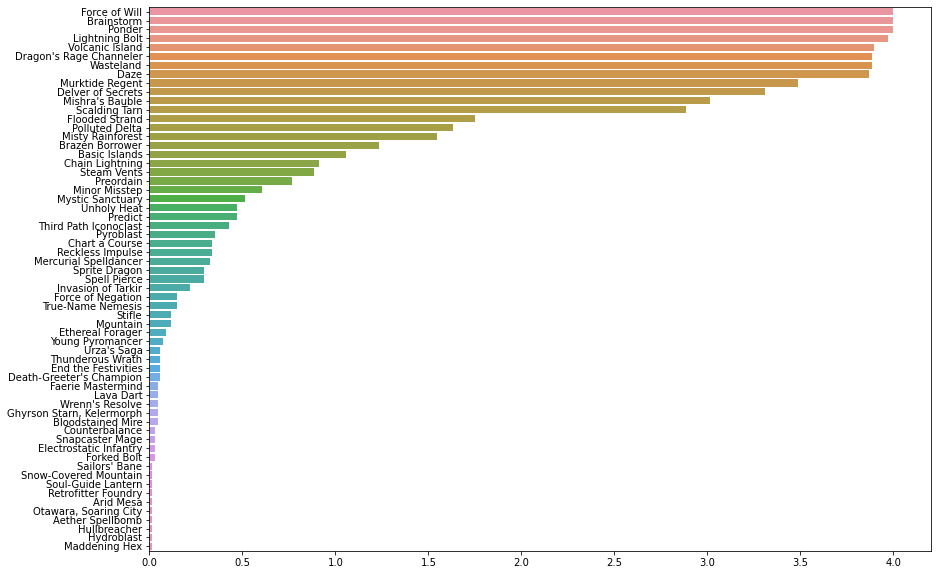

In [113]:
fig = plt.figure(figsize=(14,10))
series_to_plot = df_main.mean().sort_values(ascending=False)
sns.barplot(x=series_to_plot, y=series_to_plot.index)

In [114]:
dfi.export(
    df_main_agg_t,
    "mainboard_statistics.png",
    table_conversion="matplotlib"
)

# Sideboard analysis

## Execution

In [115]:
# Execution of card_grouper function several times to group different cards
red_blasts = ["Red Elemental Blast", "Pyroblast"]
blue_blasts = ["Blue Elemental Blast", "Hydroblast"]

cardlists = [red_blasts, blue_blasts]
cardnames = ["Red Blasts", "Blue Blasts"]

df_side = card_grouper(df_side, cardlists, cardnames)

In [116]:
# Establish specific order to show the list after groupings
usual_cards_side = ["Force of Negation", "Counterbalance", "Red Blasts", "Blue Blasts", "Surgical Extraction", "Grafdigger's Cage", "Fury", "Meltdown"]

# Creating a list of the cards not included in the usual_cards, to show them after the usual ones
cols_side = df_side.columns.tolist()
extra_cards_side = [element for element in cols_side if element not in usual_cards_side]

# The order of the dataframe will be the usual cards firstly, and then the extra cards
side_order = usual_cards_side + extra_cards_side

# Ordering of the dataframe
df_side = df_side[side_order]

# Selecting the cards for the representative list of cards for mainboard
# For this, we get the mean of each row (number or copies of each card), and round it to the nearest unit
selected_side = df_side.mean().round(0)
# Only includes those rows which mean is not 0. As we have rounded to nearest unit, if the mean of a row is less
# than 0.5, it is rounded to 0, then is not included in the selected_mainboard list.
selected_side = selected_side[selected_side != 0]

## Results

In [117]:
# Firstly, printing of all the list studied
print("ANALYZED DECKLISTS' SIDEBOARD:")
# Print transpose of df for better visibility
df_side_t = df_side.T
with pd.option_context("display.max_rows", None):
    display(df_side_t)

ANALYZED DECKLISTS' SIDEBOARD:


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
Force of Negation,1,2,0,2,2,2,2,0,1,1,...,2,1,1,2,2,2,2,2,2,2
Counterbalance,0,1,3,0,0,0,1,2,0,1,...,0,0,0,1,1,1,0,0,0,1
Red Blasts,3,3,4,3,3,4,3,3,3,2,...,2,3,3,3,3,4,4,3,3,4
Blue Blasts,2,1,0,0,1,1,0,2,1,1,...,2,1,1,1,2,2,0,0,1,0
Surgical Extraction,1,2,2,3,2,2,1,2,2,2,...,2,2,2,2,2,2,2,3,2,2
Grafdigger's Cage,1,0,0,1,1,0,1,0,1,1,...,1,0,2,1,0,1,1,0,1,1
Fury,0,0,0,0,1,0,1,0,0,1,...,0,0,2,1,0,0,0,1,0,0
Meltdown,2,2,2,2,1,2,2,2,2,2,...,0,1,2,2,1,2,2,2,2,2
Abrade,0,0,2,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Blood Moon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [118]:
# Then, printing of statistic analysis of each card
print("DECKLISTS' SIDEBOARD STATISTICS:")
# Print transpose of df for better visibility
df_side_agg = df_side.agg([mode, "median", "mean", "std", std_over_mean, "sum", "count", "min", "max",
                           perc_0, perc_1, perc_2, perc_3, perc_4])
df_side_agg_t = df_side_agg.T
with pd.option_context("display.max_rows", None):
    display(df_side_agg_t)

DECKLISTS' SIDEBOARD STATISTICS:


,mode,median,mean,std,std_over_mean,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4
Force of Negation,2.0,2.0,1.485294,0.722612,0.486511,101.0,68.0,0.0,2.0,0.132353,0.250000,0.617647,0.000000,0.000000
Counterbalance,0.0,0.0,0.676471,0.800022,1.182641,46.0,68.0,0.0,3.0,0.514706,0.308824,0.161765,0.014706,0.000000
Red Blasts,3.0,3.0,3.132353,0.596117,0.190310,213.0,68.0,2.0,4.0,0.000000,0.000000,0.117647,0.632353,0.250000
Blue Blasts,1.0,1.0,0.794118,0.783388,0.986488,54.0,68.0,0.0,3.0,0.397059,0.441176,0.132353,0.029412,0.000000
Surgical Extraction,2.0,2.0,2.117647,0.658569,0.310991,144.0,68.0,0.0,4.0,0.014706,0.088235,0.691176,0.176471,0.029412
Grafdigger's Cage,1.0,1.0,0.720588,0.619234,0.859345,49.0,68.0,0.0,2.0,0.367647,0.544118,0.088235,0.000000,0.000000
Fury,0.0,0.0,0.235294,0.492258,2.092096,16.0,68.0,0.0,2.0,0.794118,0.176471,0.029412,0.000000,0.000000
Meltdown,2.0,2.0,1.676471,0.609408,0.363507,114.0,68.0,0.0,3.0,0.058824,0.220588,0.705882,0.014706,0.000000
Abrade,0.0,0.0,0.191176,0.465443,2.434626,13.0,68.0,0.0,2.0,0.838235,0.132353,0.029412,0.000000,0.000000
Blood Moon,0.0,0.0,0.058824,0.293326,4.986549,4.0,68.0,0.0,2.0,0.955882,0.029412,0.014706,0.000000,0.000000


In [119]:
# Finally, list of selected cards
print("SELECTED SIDEBOARD:")
print(selected_side)
print("Total cards: {}".format(selected_side.sum()))

SELECTED SIDEBOARD:
Force of Negation      1.0
Counterbalance         1.0
Red Blasts             3.0
Blue Blasts            1.0
Surgical Extraction    2.0
Grafdigger's Cage      1.0
Meltdown               2.0
dtype: float64
Total cards: 11.0


<AxesSubplot:>

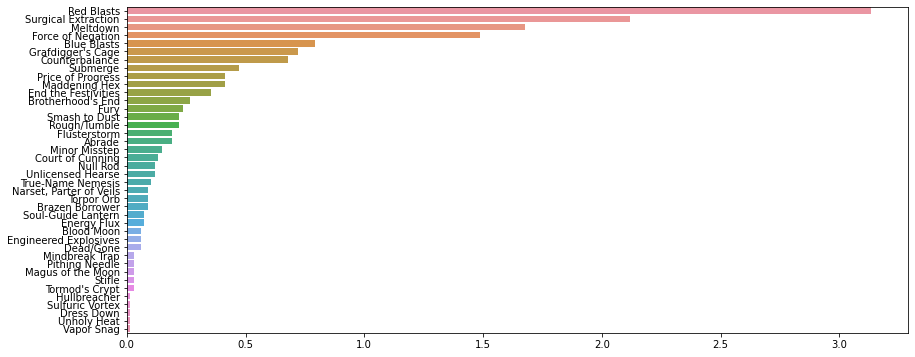

In [120]:
fig = plt.figure(figsize=(14,6))
series_to_plot = df_side.mean().sort_values(ascending=False)
sns.barplot(x=series_to_plot, y=series_to_plot.index)

In [121]:
dfi.export(
    df_side_agg_t,
    "sideboard_statistics.png",
    table_conversion="matplotlib"
)

# Tests

In [122]:
# def show_group(df, selection):
#     sum = df_side.loc[selection].sum()
#     sum.name = "Sum"
#     print(df_side.loc[selection].append(sum.transpose()))
#     print("Mean: {:.2f}".format(sum.sum()/len(sum)))
#     print("\n")
#     return

In [123]:
# selection = ["Force of Negation"]
# show_group(df_side, selection)

In [124]:
df = df_main_agg_t.copy()

In [125]:
df.drop("std_over_mean", axis=1, inplace=True)

In [126]:
df.head()

,mode,median,mean,std,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4,Type
Delver of Secrets,4.0,4.0,3.308824,1.478779,225.0,68.0,0.0,4.0,0.161765,0.000000,0.000000,0.044118,0.794118,Creatures
Dragon's Rage Channeler,4.0,4.0,3.882353,0.680856,264.0,68.0,0.0,4.0,0.029412,0.000000,0.000000,0.000000,0.970588,Creatures
Murktide Regent,4.0,4.0,3.485294,0.722612,237.0,68.0,0.0,4.0,0.014706,0.000000,0.044118,0.367647,0.573529,Creatures
Brazen Borrower,1.0,1.0,1.235294,0.693631,84.0,68.0,0.0,2.0,0.147059,0.470588,0.382353,0.000000,0.000000,Creatures
Force of Will,4.0,4.0,4.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Counters


In [127]:
df["Final"] = df["mean"].round(0)

In [128]:
df.loc["Delver of Secrets", "Diff"] = df.loc["Delver of Secrets", "Final"] - df.loc["Delver of Secrets", "mean"]
df.loc["Dragon's Rage Channeler":, "Diff"] = df.loc["Dragon's Rage Channeler":, "Final"] - df.loc["Dragon's Rage Channeler":, "mean"]
df["Final"].sum()

57.0

In [129]:
df.loc["Mishra's Bauble", "Final"] += 1

In [130]:
df.sort_values(by="Diff", ascending=True)

,mode,median,mean,std,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4,Type,Final,Diff
Murktide Regent,4.0,4.0,3.485294,0.722612,237.0,68.0,0.0,4.0,0.014706,0.000000,0.044118,0.367647,0.573529,Creatures,3.0,-0.485294
Predict,0.0,0.0,0.470588,1.043396,32.0,68.0,0.0,4.0,0.808824,0.014706,0.102941,0.044118,0.029412,Cantrips,0.0,-0.470588
Unholy Heat,0.0,0.0,0.470588,0.657235,32.0,68.0,0.0,2.0,0.617647,0.294118,0.088235,0.000000,0.000000,Removals,0.0,-0.470588
Third Path Iconoclast,0.0,0.0,0.426471,1.097027,29.0,68.0,0.0,4.0,0.852941,0.014706,0.029412,0.058824,0.044118,Creatures,0.0,-0.426471
Pyroblast,0.0,0.0,0.352941,0.511501,24.0,68.0,0.0,2.0,0.661765,0.323529,0.014706,0.000000,0.000000,Others,0.0,-0.352941
Reckless Impulse,0.0,0.0,0.338235,1.001645,23.0,68.0,0.0,4.0,0.882353,0.014706,0.029412,0.029412,0.044118,Cantrips,0.0,-0.338235
Chart a Course,0.0,0.0,0.338235,0.839515,23.0,68.0,0.0,4.0,0.838235,0.029412,0.102941,0.014706,0.014706,Cantrips,0.0,-0.338235
Mercurial Spelldancer,0.0,0.0,0.323529,0.905063,22.0,68.0,0.0,3.0,0.882353,0.000000,0.029412,0.088235,0.000000,Creatures,0.0,-0.323529
Delver of Secrets,4.0,4.0,3.308824,1.478779,225.0,68.0,0.0,4.0,0.161765,0.000000,0.000000,0.044118,0.794118,Creatures,3.0,-0.308824
Sprite Dragon,0.0,0.0,0.294118,0.978253,20.0,68.0,0.0,4.0,0.897059,0.029412,0.014706,0.000000,0.058824,Creatures,0.0,-0.294118


In [131]:
df["Diff"] = df["Final"] - df["mean"]
df["Diff_acum"] = df["Diff"].cumsum()
print(df["Final"].sum())
df

58.0


,mode,median,mean,std,sum,count,min,max,perc_0,perc_1,perc_2,perc_3,perc_4,Type,Final,Diff,Diff_acum
Delver of Secrets,4.0,4.0,3.308824,1.478779,225.0,68.0,0.0,4.0,0.161765,0.000000,0.000000,0.044118,0.794118,Creatures,3.0,-0.308824,-0.308824
Dragon's Rage Channeler,4.0,4.0,3.882353,0.680856,264.0,68.0,0.0,4.0,0.029412,0.000000,0.000000,0.000000,0.970588,Creatures,4.0,0.117647,-0.191176
Murktide Regent,4.0,4.0,3.485294,0.722612,237.0,68.0,0.0,4.0,0.014706,0.000000,0.044118,0.367647,0.573529,Creatures,3.0,-0.485294,-0.676471
Brazen Borrower,1.0,1.0,1.235294,0.693631,84.0,68.0,0.0,2.0,0.147059,0.470588,0.382353,0.000000,0.000000,Creatures,1.0,-0.235294,-0.911765
Force of Will,4.0,4.0,4.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Counters,4.0,0.000000,-0.911765
Daze,4.0,4.0,3.867647,0.341394,263.0,68.0,3.0,4.0,0.000000,0.000000,0.000000,0.132353,0.867647,Counters,4.0,0.132353,-0.779412
Lightning Bolt,4.0,4.0,3.970588,0.170214,270.0,68.0,3.0,4.0,0.000000,0.000000,0.000000,0.029412,0.970588,Removals,4.0,0.029412,-0.750000
Chain Lightning,0.0,1.0,0.911765,0.876480,62.0,68.0,0.0,3.0,0.397059,0.323529,0.250000,0.029412,0.000000,Removals,1.0,0.088235,-0.661765
Unholy Heat,0.0,0.0,0.470588,0.657235,32.0,68.0,0.0,2.0,0.617647,0.294118,0.088235,0.000000,0.000000,Removals,0.0,-0.470588,-1.132353
Brainstorm,4.0,4.0,4.000000,0.000000,272.0,68.0,4.0,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,Cantrips,4.0,0.000000,-1.132353
